In [1]:
import numpy as np
import tqdm
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from decimal import Decimal
from time import time
from copy import deepcopy as dp

## Define functions for sorting and function calc.

In [2]:
def const(v):
    v = v
    return v

def sum_(v):
    return np.sum(v)

def prod(v):
    return np.prod(v)

def poly_simple(v, x=1.5):
    n = len(v)
    res = 0
    for p, k in zip(range(n), v):
        res += Decimal(x)**Decimal(p) * Decimal(k)
        
    return res

def poly_horner(v, x=1.5):
    n = len(v)
    res = 0
    for i in range(n-1, -1, -1):
        res = Decimal(res) * Decimal(x) + Decimal(v[i])
        
    return res 

def bubble_sort(v):
    n = len(v)
    for i in range(1, n):
        swapped = False
        for j in range(n - i):
            if v[j] < v[j+1]:
                v[j], v[j+1] = v[j+1], v[j]
                swapped = True
        if not swapped:
            break
    
    return v

def qucksort(v):
    return np.sort(v, kind="quick")

def timsort(v):
    return v.sort()

def timeit(v, func):
    start = time()
    func(*v)
    elapsed_time = time() - start
    
    return elapsed_time

def generate_v(length):
    return np.array([ np.random.uniform() for _ in range(length) ])

def generate_matrixes(n):
    A = np.random.uniform(size=(n, n))
    B = np.random.uniform(size=(n, n))
    return A, B

def mult_matrix(A, B):
    return np.dot(A, B)

def run_test(v, A, B, n):

    elapsed_time = [0 for _ in range(10)]
    
    for _ in range(5):
    
        run = [n]
    
        run.append(timeit( [dp(v)], const_func ))
        run.append(timeit( [dp(v)], sum_func ))
        run.append(timeit( [dp(v)], prod_func ))
        run.append(timeit( [dp(v)], poly_simple ))
        run.append(timeit( [dp(v)], poly_horner ))
        run.append(timeit( [dp(v)], bubble_sort ))
        run.append(timeit( [dp(v)], qucksort ))
        run.append(timeit( [dp(v)], timsort ))

        run.append(timeit( [dp(A), dp(B)], mult_matrix ))
    
        elapsed_time = np.array(elapsed_time) +  np.array(run)

    elapsed_time = np.divide(elapsed_time, 5)
    
    return elapsed_time

def collect_data(n_max=2000):    
    experiment_data = []
    
    for n in tqdm.tqdm_notebook(range(1, n_max+1)):
        v = generate_v(n)
        A, B = generate_matrixes(n)
        
        run_results = run_test(v, A, B, n)
        
        experiment_data.append(run_results)
        
    result = pd.DataFrame(data=experiment_data, columns=["n", "const", 
                                                         "sum", "prod",
                                                        "simple_poly", "horner_poly",
                                                        "bubble_sort", "quicksort",
                                                        "timsort", "matrix_dot"])

    return result

## Plot experimental result with filtering to reduce CPU throttling and context switching noise

In [3]:
import scipy.signal

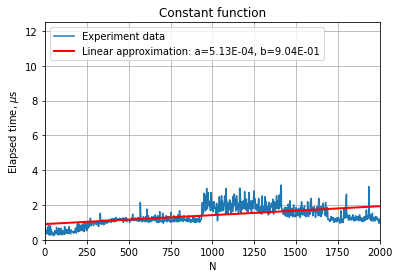

In [4]:

def lin_curve(x, k, b):
    return k*x + b

def parabola(x, a, b):
    return a*x**2 + b*x

def cubic_curve(x, a):
    return a*x**3

def log_curve(x, a):
    return a*x*np.log(x)

algos_time = pd.read_csv("samples.csv")
del algos_time["Unnamed: 0"]

x_data = algos_time.n

fig, ax = plt.subplots()
plt.grid()

plt.ylim(0, 12.5)
plt.xlim(0, 2000)

ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, $\mu$s")
ax.set_title(f"Constant function")

exp = scipy.signal.medfilt(algos_time.const*10**6)
plt.plot(x_data, exp, label="Experiment data")

popt, pcov = curve_fit(lin_curve, x_data, algos_time.const*10**6)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, lin_curve(x_data, *popt), 'r-',  linewidth=2,
         label=f'Linear approximation: a={params[0]}, b={params[1]}') 

plt.legend(loc="upper left")

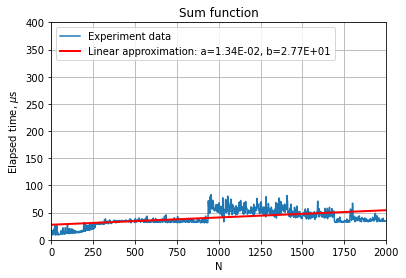

In [5]:
fig, ax = plt.subplots()
plt.grid()

x_data = algos_time.n

plt.ylim(0, 400)
plt.xlim(0, 2000)

ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, $\mu$s")
ax.set_title(f"Sum function")

exp = scipy.signal.medfilt(algos_time["sum"]*10**6)
plt.plot(x_data, exp, label="Experiment data")

popt, pcov = curve_fit(lin_curve, x_data, algos_time["sum"]*10**6)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, lin_curve(x_data, *popt), 'r-', linewidth=2,
         label=f'Linear approximation: a={params[0]}, b={params[1]}') 

plt.legend(loc="upper left")

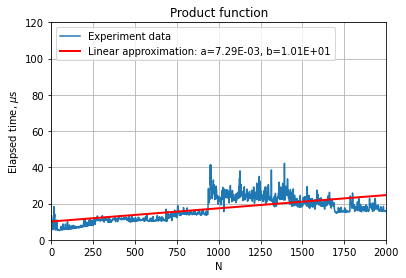

In [6]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, $\mu$s")
ax.set_title(f"Product function")

exp = scipy.signal.medfilt(algos_time["prod"]*10**6)
plt.plot(x_data, exp, label="Experiment data")

plt.ylim(0, 120)
plt.xlim(0, 2000)

popt, pcov = curve_fit(lin_curve, x_data, algos_time["prod"]*10**6)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, lin_curve(x_data, *popt), 'r-', linewidth=2,
         label=f'Linear approximation: a={params[0]}, b={params[1]}') #% tuple(params))

plt.legend(loc="upper left")

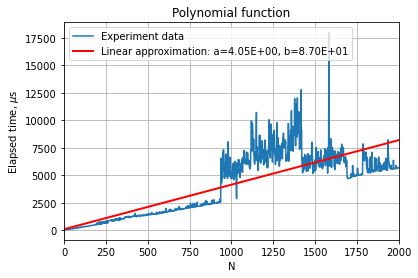

In [7]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, $\mu$s")
ax.set_title(f"Polynomial function")

plt.xlim(0, 2000)

exp = scipy.signal.medfilt(algos_time.simple_poly*10**6)
plt.plot(x_data, exp, label="Experiment data")

popt, pcov = curve_fit(lin_curve, x_data, algos_time.simple_poly*10**6)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, lin_curve(x_data, *popt), 'r-', linewidth=2,
         label=f'Linear approximation: a={params[0]}, b={params[1]}') #% tuple(params))

plt.legend(loc="upper left")

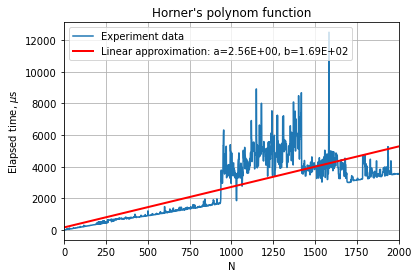

In [8]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, $\mu$s")
ax.set_title(f"Horner's polynom function")

plt.xlim(0, 2000)

exp = scipy.signal.medfilt(algos_time.horner_poly*10**6)
plt.plot(x_data, exp, label="Experiment data")

popt, pcov = curve_fit(lin_curve, x_data, algos_time.horner_poly*10**6)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, lin_curve(x_data, *popt), 'r-',linewidth=2,
         label=f'Linear approximation: a={params[0]}, b={params[1]}') #% tuple(params))

plt.legend(loc="upper left")

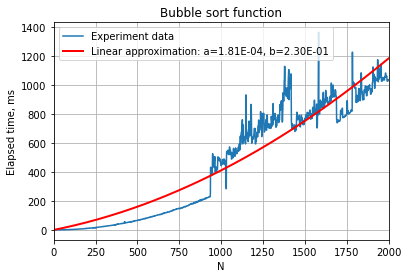

In [9]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, ms")
ax.set_title(f"Bubble sort function")

plt.xlim(0, 2000)
exp = scipy.signal.medfilt(algos_time.bubble_sort*10**3)
plt.plot(x_data, exp, label="Experiment data")

popt, pcov = curve_fit(parabola, x_data, algos_time.bubble_sort*10**3)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, parabola(x_data, *popt), 'r-', linewidth=2,
         label=f'Linear approximation: a={params[0]}, b={params[1]}') #% tuple(params))

plt.legend(loc="upper left")

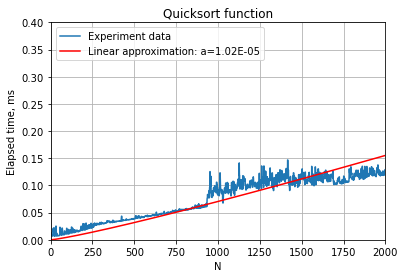

In [10]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, ms")
ax.set_title(f"Quicksort function")

plt.ylim(0, 0.4)
plt.xlim(0, 2000)
exp = scipy.signal.medfilt(algos_time.quicksort*10**3)
plt.plot(x_data, exp, label="Experiment data")

popt, pcov = curve_fit(log_curve, x_data, algos_time.quicksort*10**3)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, log_curve(x_data, *popt), 'r-',
         label=f'Linear approximation: a={params[0]}')#, b={params[1]}') #% tuple(params))

plt.legend(loc="upper left")

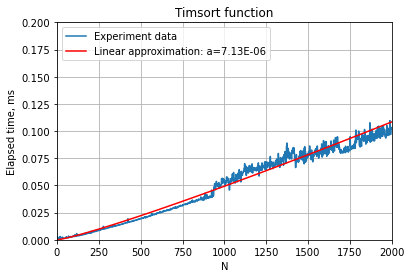

In [11]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, ms")
ax.set_title(f"Timsort function")

plt.ylim(0, 0.2)
plt.xlim(0, 2000)
exp = scipy.signal.medfilt(algos_time.timsort*10**3)
plt.plot(x_data, exp, label="Experiment data")

popt, pcov = curve_fit(log_curve, x_data, algos_time.timsort*10**3)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, log_curve(x_data, *popt), 'r-',
         label=f'Linear approximation: a={params[0]}')#, b={params[1]}') #% tuple(params))

plt.legend(loc="upper left")

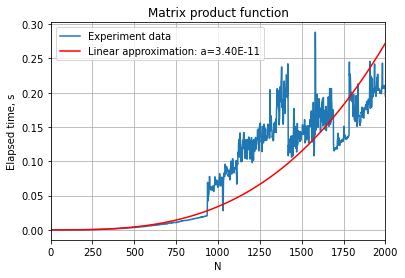

In [12]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, s")
ax.set_title(f"Matrix product function")

plt.xlim(0, 2000)
exp = scipy.signal.medfilt(algos_time.matrix_dot)
plt.plot(x_data, exp, label="Experiment data")

popt, pcov = curve_fit(cubic_curve, x_data, algos_time.matrix_dot)

params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, cubic_curve(x_data, *popt), 'r-',
         label=f'Linear approximation: a={params[0]}') #% tuple(params))


plt.legend(loc="upper left")
